In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [3]:
df = pd.read_csv("data/df_preprocessed_log_dummies.csv")

In [4]:
df.head()

,state,delta_dead_laun,launch_day,launch_hour,name_len,blurb_len,goal_usd_log,AU,BE,CA,...,fashion,film & video,food,games,journalism,music,photography,publishing,technology,theater
0,1,720.0,3,19,23,125,6.907755,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,720.0,0,7,51,108,9.615805,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1439.0,3,19,34,133,9.479141,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,720.0,0,21,40,121,7.937375,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,720.0,3,4,31,134,8.160518,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [5]:
# define features and target
X = df.drop('state', axis=1)
y = df['state']

In [6]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [7]:
def train(X_train, y_train, X_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    return y_pred, y_pred_train

In [8]:
def evaluate(y_true, y_pred, y_train, y_pred_train):
    print(classification_report(y_train, y_pred_train))
    print(classification_report(y_true, y_pred))
    cm_test = confusion_matrix(y_true, y_pred, normalize=None)
    cm_train = confusion_matrix(y_train, y_pred_train, normalize=None)
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
    sns.heatmap(cm_train, annot=True, fmt='g', ax=ax1)
    sns.heatmap(cm_test, annot=True, fmt='g', ax=ax2)
    ax1.title.set_text('Train')
    ax2.title.set_text('Test')

In [128]:
# train DecistionTree
tree = DecisionTreeClassifier()
y_pred_tree, y_pred_tree_train = train(X_train, y_train, X_test, tree)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52770
           1       1.00      1.00      1.00     82093

    accuracy                           1.00    134863
   macro avg       1.00      1.00      1.00    134863
weighted avg       1.00      1.00      1.00    134863

              precision    recall  f1-score   support

           0       0.58      0.56      0.57     22427
           1       0.73      0.75      0.74     35372

    accuracy                           0.67     57799
   macro avg       0.66      0.65      0.65     57799
weighted avg       0.67      0.67      0.67     57799



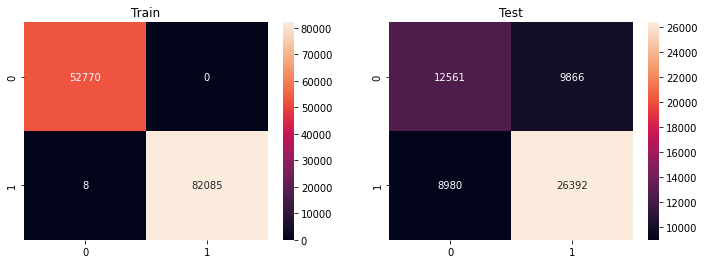

In [158]:
# evaluate tree
evaluate(y_test, y_pred_tree, y_train, y_pred_tree_train)

In [9]:
# get parameter
print(f'depth: {tree.get_params()}')

NameError: name 'tree' is not defined

In [37]:
f1_score(y_test, y_pred_tree)

0.7375113279888463

In [38]:
roc_auc_score(y_test, y_pred_tree)

0.6530638826982959

In [159]:
# train svm
svm = SVC(max_iter=10000)
y_pred_svm, y_pred_svm_train = train(X_train, y_train, X_test, svm)

/Users/laurenthartmann/neuefische/kickstarter-ml/.venv/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.28      0.10      0.14     22427
           1       0.60      0.84      0.70     35372

    accuracy                           0.55     57799
   macro avg       0.44      0.47      0.42     57799
weighted avg       0.47      0.55      0.48     57799



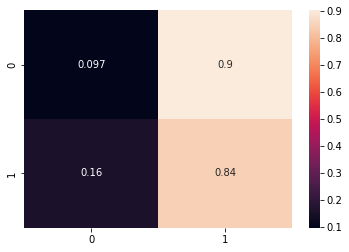

In [61]:
# evaluate svm
evaluate(y_test, y_pred_svm, y_train, y_pred_svm_train)

In [11]:
# train random forest
forest = RandomForestClassifier()
y_pred_forest, y_pred_forest_train = train(X_train, y_train, X_test, forest)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52770
           1       1.00      1.00      1.00     82093

    accuracy                           1.00    134863
   macro avg       1.00      1.00      1.00    134863
weighted avg       1.00      1.00      1.00    134863

              precision    recall  f1-score   support

           0       0.72      0.55      0.63     22427
           1       0.75      0.86      0.80     35372

    accuracy                           0.74     57799
   macro avg       0.74      0.71      0.72     57799
weighted avg       0.74      0.74      0.74     57799



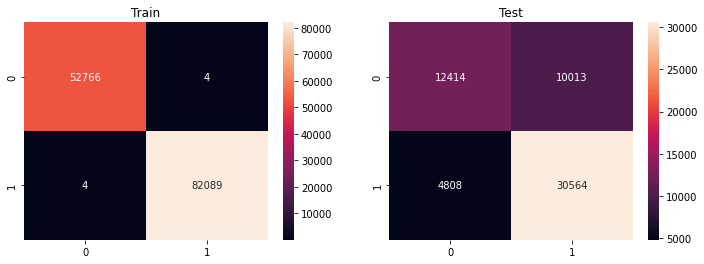

In [12]:
# evaluate random forest
evaluate(y_test, y_pred_forest, y_train, y_pred_forest_train)

In [13]:
forest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [30]:
# randomized search with random forest
rs_params = {
    'n_estimators': [100, 200, 500],
    'max_features': [None, 'sqrt'],
    'max_depth': [50, 100, 150],
    'min_samples_split': [50, 100, 200],
    'min_samples_leaf': [50, 100, 200],
    'bootstrap': [True, False]}

rs_forest = RandomizedSearchCV(forest, param_distributions=rs_params, n_jobs=-1, cv=5, scoring='f1', verbose=2, random_state=42)

In [31]:
rs_forest.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, max_depth=150, max_features=None, min_samples_leaf=200, min_samples_split=200, n_estimators=100; total time= 1.3min
[CV] END bootstrap=True, max_depth=150, max_features=None, min_samples_leaf=200, min_samples_split=200, n_estimators=100; total time= 1.3min
[CV] END bootstrap=True, max_depth=150, max_features=None, min_samples_leaf=200, min_samples_split=200, n_estimators=100; total time= 1.3min
[CV] END bootstrap=True, max_depth=150, max_features=None, min_samples_leaf=200, min_samples_split=200, n_estimators=100; total time= 1.3min
[CV] END bootstrap=True, max_depth=150, max_features=None, min_samples_leaf=200, min_samples_split=200, n_estimators=100; total time= 1.3min
[CV] END bootstrap=True, max_depth=150, max_features=None, min_samples_leaf=50, min_samples_split=50, n_estimators=100; total time= 1.6min
[CV] END bootstrap=True, max_depth=150, max_features=None, min_samples_leaf=50, min_samples_spl

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [50, 100, 150],
                                        'max_features': [None, 'sqrt'],
                                        'min_samples_leaf': [50, 100, 200],
                                        'min_samples_split': [50, 100, 200],
                                        'n_estimators': [100, 200, 500]},
                   random_state=42, scoring='f1', verbose=2)

In [32]:
best_rs = rs_forest.best_estimator_

In [33]:
rs_forest.best_params_

{'n_estimators': 200,
 'min_samples_split': 200,
 'min_samples_leaf': 50,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': False}

In [34]:
y_pred_rs, y_pred_rs_train = train(X_train, y_train, X_test, best_rs)

              precision    recall  f1-score   support

           0       0.71      0.48      0.57     52770
           1       0.72      0.88      0.79     82093

    accuracy                           0.72    134863
   macro avg       0.72      0.68      0.68    134863
weighted avg       0.72      0.72      0.71    134863

              precision    recall  f1-score   support

           0       0.70      0.47      0.56     22427
           1       0.72      0.87      0.79     35372

    accuracy                           0.72     57799
   macro avg       0.71      0.67      0.68     57799
weighted avg       0.71      0.72      0.70     57799



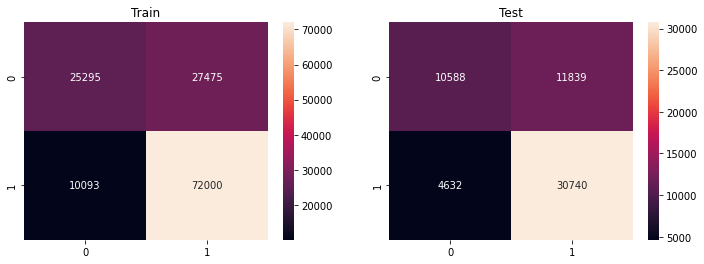

In [35]:
evaluate(y_test, y_pred_rs, y_train, y_pred_rs_train)

In [37]:
# train adjusted forest
forest2 = RandomForestClassifier(n_estimators=100, max_features='sqrt', max_depth=50, min_samples_split= 200, min_samples_leaf= 50)
y_pred_forest2, y_pred_forest2_train = train(X_train, y_train, X_test, forest2)

              precision    recall  f1-score   support

           0       0.71      0.47      0.57     52770
           1       0.72      0.87      0.79     82093

    accuracy                           0.72    134863
   macro avg       0.71      0.67      0.68    134863
weighted avg       0.71      0.72      0.70    134863

              precision    recall  f1-score   support

           0       0.69      0.47      0.56     22427
           1       0.72      0.87      0.79     35372

    accuracy                           0.71     57799
   macro avg       0.71      0.67      0.67     57799
weighted avg       0.71      0.71      0.70     57799



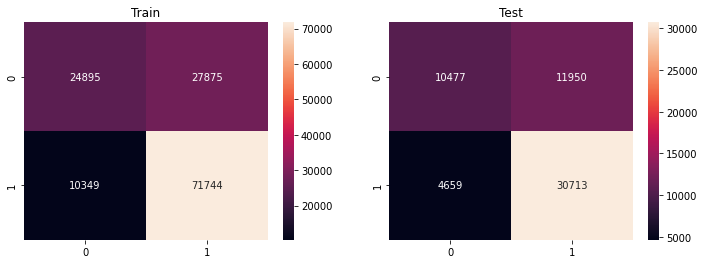

In [38]:
evaluate(y_test, y_pred_forest2, y_train, y_pred_forest2_train)

In [44]:
# gridsearch with random forest
forest_params = {
    'n_estimators': [500, 1000],
    'criterion': ['gini', 'entropy'],
    'max_depth': [50, 100, 150],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_forest = GridSearchCV(forest, param_grid=forest_params, n_jobs=-1, cv=5, scoring='f1', verbose=2)

In [45]:
grid_forest.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END criterion=gini, max_depth=50, min_samples_split=50, n_estimators=100; total time=  30.2s
[CV] END criterion=gini, max_depth=50, min_samples_split=50, n_estimators=100; total time=  30.3s
[CV] END criterion=gini, max_depth=50, min_samples_split=50, n_estimators=100; total time=  30.3s
[CV] END criterion=gini, max_depth=50, min_samples_split=50, n_estimators=100; total time=  30.4s
[CV] END criterion=gini, max_depth=50, min_samples_split=50, n_estimators=100; total time=  30.5s
[CV] END criterion=gini, max_depth=50, min_samples_split=50, n_estimators=200; total time=  58.0s
[CV] END criterion=gini, max_depth=50, min_samples_split=50, n_estimators=200; total time=  58.2s
[CV] END criterion=gini, max_depth=50, min_samples_split=50, n_estimators=200; total time=  58.3s
[CV] END criterion=gini, max_depth=50, min_samples_split=100, n_estimators=100; total time=  25.1s
[CV] END criterion=gini, max_depth=50, min_samples_spli

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [50, 100, 150],
                         'min_samples_split': [50, 100, 200],
                         'n_estimators': [100, 200, 500]},
             scoring='f1', verbose=2)

In [49]:
best_forest = grid_forest.best_estimator_

In [50]:
grid_forest.best_params_

{'criterion': 'entropy',
 'max_depth': 100,
 'min_samples_split': 50,
 'n_estimators': 200}

In [51]:
# predict with best random forest
y_pred_bestforest = best_forest.predict(X_test)

              precision    recall  f1-score   support

           0       0.71      0.50      0.59     22427
           1       0.73      0.87      0.80     35372

    accuracy                           0.73     57799
   macro avg       0.72      0.69      0.69     57799
weighted avg       0.72      0.73      0.72     57799



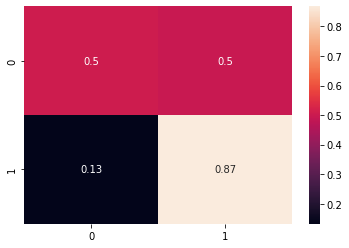

In [52]:
# evaluate best forest
evaluate(y_test, y_pred_bestforest)

In [53]:
f1_score(y_test, y_pred_bestforest)

0.7955688002073076

In [54]:
roc_auc_score(y_test, y_pred_bestforest)

0.6863475693193655

In [55]:
# train adjusted random forest
forest_adj = RandomForestClassifier(max_depth=100, n_estimators=200, min_samples_split=50)
y_pred_forestadj = train(X_train, y_train, X_test, forest_adj)

              precision    recall  f1-score   support

           0       0.71      0.51      0.59     22427
           1       0.74      0.87      0.80     35372

    accuracy                           0.73     57799
   macro avg       0.72      0.69      0.69     57799
weighted avg       0.72      0.73      0.72     57799



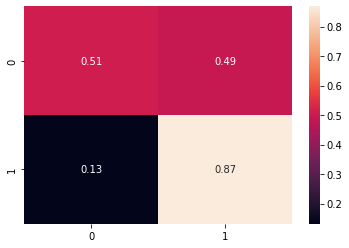

In [56]:
# evaluate adjusted forest
evaluate(y_test, y_pred_forestadj)

In [57]:
roc_auc_score(y_test, y_pred_forestadj)

0.6873339344904924

## Error analysis

In [55]:
error_df = pd.read_csv("data/df_eda2.csv")

In [57]:
# replace state values with 0s and 1s
error_df['state'].replace(to_replace={'successful': 1, 'failed': 0}, inplace=True)

In [58]:
error_df.head()

,country,state,goal_usd_log,name_len,category,delta_dead_laun
0,US,1,6.907755,23,"""slug"":""games/playing cards""",720.0
1,US,1,9.615805,51,"""slug"":""music/rock""",720.0
2,GB,0,9.479141,34,"""slug"":""games/playing cards""",1439.0
3,US,1,7.937375,40,"""slug"":""publishing/nonfiction""",720.0
4,US,1,8.160518,31,"""slug"":""music/classical music""",720.0


In [59]:
X2 = error_df.drop('state', axis=1)
y2 = error_df['state']

In [60]:
# split the data
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=42, test_size=0.3)

In [61]:
features = pd.DataFrame(X_test2)

In [62]:
features = features.reset_index()

In [63]:
state = y_test2.reset_index()

In [64]:
state_pred = pd.DataFrame(y_pred_forest2)

In [65]:
df_error = pd.concat([features, state_pred, state], axis=1)

In [66]:
df_error.rename(columns={0: 'state_pred'}, inplace=True)

In [67]:
false_pos = df_error.query('state == 0 and state_pred == 1')

In [68]:
false_neg = df_error.query('state == 1 and state_pred == 0')

<AxesSubplot:xlabel='name_len', ylabel='Count'>

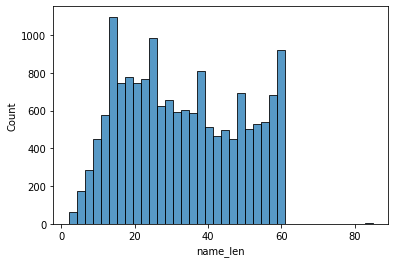

In [69]:
sns.histplot(data=false_pos, x='name_len')

<AxesSubplot:xlabel='country', ylabel='Count'>

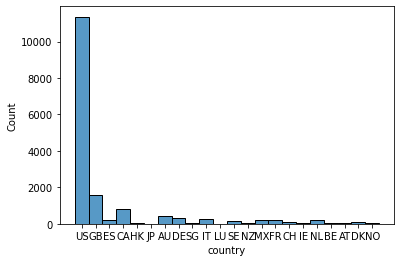

In [70]:
sns.histplot(data=false_pos, x='country')

<AxesSubplot:xlabel='goal_usd_log', ylabel='Count'>

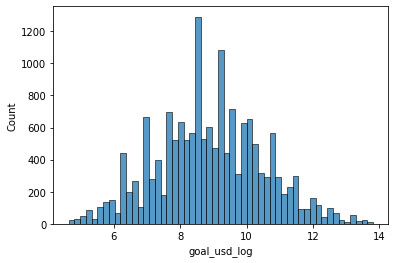

In [71]:
sns.histplot(data=false_pos, x='goal_usd_log')

<AxesSubplot:xlabel='category', ylabel='Count'>

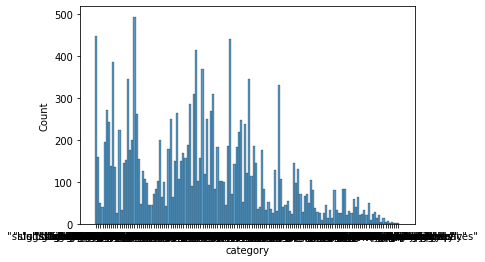

In [72]:
sns.histplot(data=false_pos, x='category')

<AxesSubplot:xlabel='delta_dead_laun', ylabel='Count'>

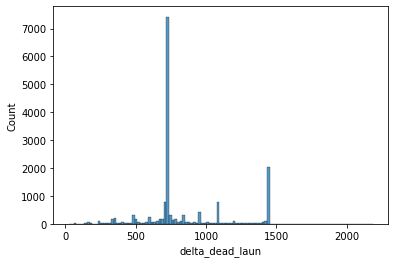

In [73]:
sns.histplot(data=false_pos, x='delta_dead_laun')

<AxesSubplot:xlabel='name_len', ylabel='Count'>

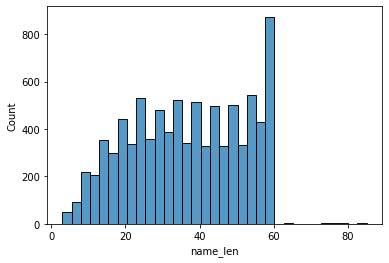

In [74]:
sns.histplot(data=false_neg, x='name_len')

<AxesSubplot:xlabel='country', ylabel='Count'>

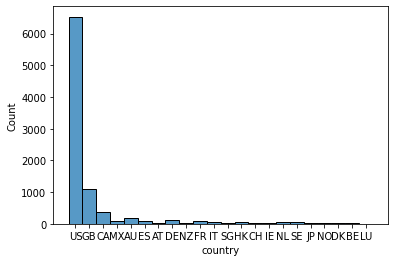

In [75]:
sns.histplot(data=false_neg, x='country')

<AxesSubplot:xlabel='goal_usd_log', ylabel='Count'>

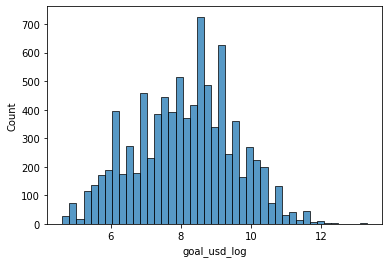

In [76]:
sns.histplot(data=false_neg, x='goal_usd_log')

<AxesSubplot:xlabel='category', ylabel='Count'>

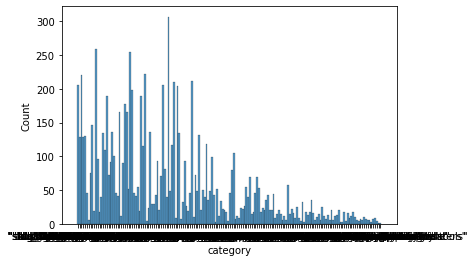

In [77]:
sns.histplot(data=false_neg, x='category')

<AxesSubplot:xlabel='delta_dead_laun', ylabel='Count'>

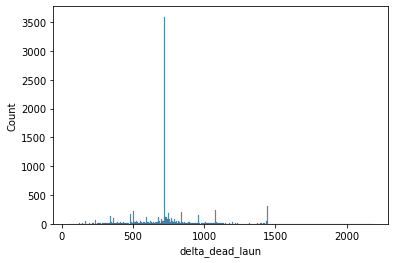

In [78]:
sns.histplot(data=false_neg, x='delta_dead_laun')

In [79]:
X.columns

Index(['delta_dead_laun', 'launch_day', 'launch_hour', 'name_len', 'blurb_len',
       'goal_usd_log', 'AU', 'BE', 'CA', 'CH', 'DE', 'DK', 'ES', 'FR', 'GB',
       'HK', 'IE', 'IT', 'JP', 'LU', 'MX', 'NL', 'NO', 'NZ', 'SE', 'SG', 'US',
       'comics', 'craft', 'crafts', 'dance', 'design', 'fashion',
       'film & video', 'food', 'games', 'journalism', 'music', 'photography',
       'publishing', 'technology', 'theater'],
      dtype='object')

<BarContainer object of 42 artists>

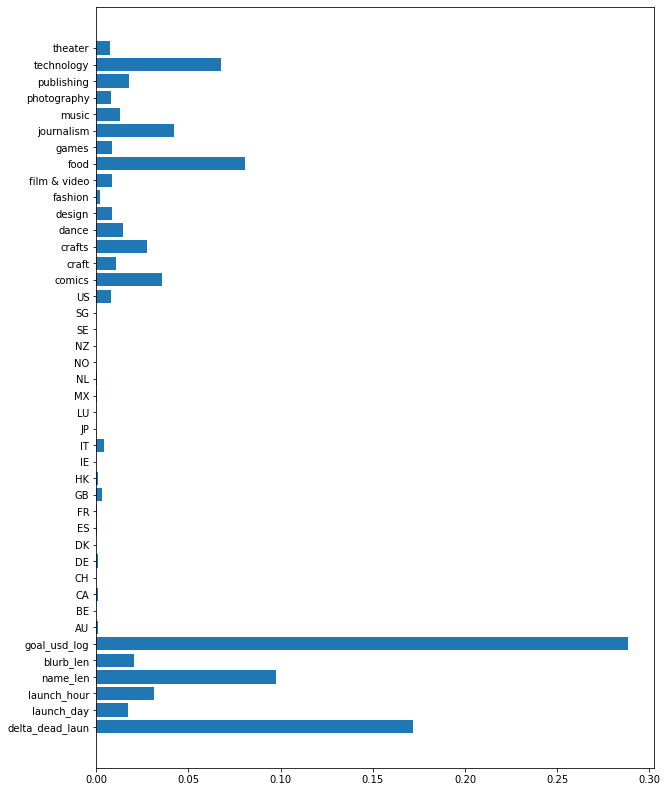

In [82]:
plt.figure(figsize=(10, 14))
plt.barh(X.columns, forest2.feature_importances_)